In [32]:

import pandas as pd   
import pandas_profiling as pp

import matplotlib.pyplot as plt
import seaborn as sns  # for data visualiztions
import random as rand
import numpy as np  # linear algebra
import sklearn
import datetime 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor  
from sklearn.tree import DecisionTreeClassifier
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import randint
from pandas import MultiIndex, Int16Dtype

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score, coverage_error, label_ranking_loss, label_ranking_average_precision_score, multilabel_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import shap
import lime
import glob
import time

import lime.lime_tabular
import plotly
np.random.seed(0)


shap.initjs() #print the js visualization code to the notebook


%matplotlib inline
get_ipython().run_line_magic('matplotlib', 'inline')



In [36]:
# Specify the folder where your CSV files are located
folder_path = ('C:/Users/USER/predictive_vl')


#csv_files

csv_files = glob.glob('*.{}'.format('csv'))
csv_files


['2019.csv',
 '2020.csv',
 '2021.csv',
 'dtree_merged_predictions.csv',
 'joined_data.csv',
 'knn_merged_predictions.csv',
 'misclassified_records_original_dataframe.csv',
 'misclassified_records_undersampled_df.csv',
 'vl_2019_chai.csv',
 'vl_2020_2021_2022_2023.csv',
 'vl_2020_chai.csv',
 'vl_2021_chai.csv']

In [3]:
#df_csv_append = pd.DataFrame()
 
# append the CSV files
#for file in csv_files:
#    df = pd.read_csv(file,dtype='unicode')
#    df_csv_append = df_csv_append.append([,df], ignore_index=True)
 
#df_csv_append.to_csv('C:/Users/USER/predictive_vl/joined_data.csv', index=False)


#df_csv_concat = pd.DataFrame()  # Create an empty DataFrame for concatenation

#for file in csv_files:
 #   df = pd.read_csv(file, dtype='unicode')
  #  df_csv_concat = pd.concat([df_csv_concat, df], ignore_index=True)

#df_csv_concat.to_csv('C:/Users/USER/predictive_vl/joined_data.csv', index=False)  # Save the concatenated DataFrame to a CSV file


In [4]:
#df_csv_append.info(memory_usage='deep')

#df_csv_concat.info(memory_usage='deep')

In [37]:
# read the dataset

#df = pd.read_csv("C:/Users/USER/predictive_vl/joined_data.csv",dtype='unicode')

df = pd.read_csv("C:/Users/USER/predictive_vl/vl_2019_chai.csv",dtype='unicode')
 
df.head()  

,sample_id,facility,district,region,hub,date_collected,date_received,sample_type,unique_id,gender,...,status,created_at,rejection_reason_id,result_alphanumeric,suppressed,result_upload_date,released_at,current_who_stage,dhis2_name,dhis2_uid
0,3235775,TASO Mbale,Mbale,Mid Eastern,Mbale Hub,2018-12-14,2018-12-21 00:00:00,P,689-A-MBL104321,F,...,1,2019-01-02 14:23:23.399445,\N,Target Not Detected,1,2019-01-09 08:58:44.713428,2019-01-09 12:00:33.024282,\N,TASO Mbale Clinic,a929G14p47c
1,3235735,IDI Mulago,Kampala,Kampala,Kampala Hub,2018-12-17,2018-12-29 00:00:00,P,2271-A-14054,F,...,1,2019-01-08 10:19:59.881071,\N,Target Not Detected,1,2019-01-10 11:17:05.123370,2019-01-10 12:52:41.086555,1,Mulago NRH - Infectious Disease Institute,aB3wfoQaDTI
2,3235736,IDI Mulago,Kampala,Kampala,Kampala Hub,2018-12-17,2018-12-19 00:00:00,P,2271-A-1759,F,...,1,2019-01-08 10:20:05.284325,\N,Target Not Detected,1,2019-01-10 11:17:06.351936,2019-01-10 12:52:43.138500,1,Mulago NRH - Infectious Disease Institute,aB3wfoQaDTI
3,3235741,IDI Mulago,Kampala,Kampala,Kampala Hub,2018-12-18,2018-12-19 00:00:00,P,2271-A-idc33724,M,...,1,2019-01-08 10:20:29.115019,\N,Target Not Detected,1,2019-01-10 11:17:10.679233,2019-01-10 12:53:04.914371,1,Mulago NRH - Infectious Disease Institute,aB3wfoQaDTI
4,3235740,IDI Mulago,Kampala,Kampala,Kampala Hub,2018-12-18,2018-12-19 00:00:00,P,2271-A-idc32759,M,...,1,2019-01-08 10:20:22.896091,\N,Target Not Detected,1,2019-01-10 11:17:09.720483,2019-01-10 12:53:05.367758,1,Mulago NRH - Infectious Disease Institute,aB3wfoQaDTI


In [66]:
df['status'].value_counts()

0    1224732
Name: status, dtype: int64

In [67]:
df['rejection_reason_id'].value_counts()

0    1224732
Name: rejection_reason_id, dtype: int64

In [38]:
#df.profile_report()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1239937 entries, 0 to 1239936
Data columns (total 32 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   sample_id                  1239937 non-null  object
 1   facility                   1239937 non-null  object
 2   district                   1239937 non-null  object
 3   region                     1239937 non-null  object
 4   hub                        1239937 non-null  object
 5   date_collected             1239937 non-null  object
 6   date_received              1239937 non-null  object
 7   sample_type                1239937 non-null  object
 8   unique_id                  1239937 non-null  object
 9   gender                     1239937 non-null  object
 10  dob                        1239937 non-null  object
 11   age                       1239937 non-null  object
 12  treatment_initiation_date  1239937 non-null  object
 13  treatment_duration         

In [39]:
values_to_remove = ['X', 'L', '\\N']
df = df[~df['gender'].isin(values_to_remove)]

In [40]:
df['gender'] = df['gender'].str.upper()

In [41]:
df['gender'].value_counts()

F    812043
M    412689
Name: gender, dtype: int64

In [42]:
df[' age'] = pd.to_numeric(df[' age'], errors='coerce')

In [43]:
df['Indication_for_VL_Testing'].value_counts()

Routine Monitoring                1104811
6 months after ART initiation       41266
Repeat Viral Load                   33391
12 months after ART initiation      15834
Left Blank                          13472
1st ANC For PMTCT                    9785
Repeat (after IAC)                   3260
Suspected Treatment Failure          2913
Name: Indication_for_VL_Testing, dtype: int64

In [44]:
df['treatment_duration'].value_counts()

2 -< 5yrs          394007
1 -< 2yrs          365968
6 months -< 1yr    252428
< 6 months         150083
5yrs and above      62182
Left Blank             64
Name: treatment_duration, dtype: int64

In [45]:
df['current_regimen'].value_counts()

1F=TDF-3TC-EFV             655751
1N=TDF-3TC-DTG             155671
1C=AZT-3TC-NVP             134035
Left Blank                  43888
1D=AZT-3TC-EFV              26212
1E=TDF-3TC-NVP              24970
2F=TDF+3TC+ATV/R            18376
4C=AZT-3TC-NVP              14572
4F=ABC-3TC-EFV              13214
4G=ABC-3TC-LPV/R            12292
2B=TDF-3TC-LPV/R            10331
2C=AZT+3TC+ATV/R             9380
3A=TDF+3TC+EFV               8590
3C=AZT-3TC-NVP               7961
3F=ABC-3TC-EFV               6813
3N=TDF-3TC-DTG               6768
5K=ABC+3TC+LPV/R             5769
4I=TDF-3TC-EFV               5032
8E=ABC-3TC-LPV/R             4742
8D=TDF-3TC-ATV/R             4709
2E=AZT-3TC-LPV/R             4603
2H=ABC+3TC+ATV/R             4258
4N=TDF-3TC-DTG               4161
Other Regimen                4116
2G=ABC-3TC-LPV/R             3571
3D=AZT-3TC-EFV               3305
4E=ABC-3TC-NVP               3182
1H=ABC+3TC+NVP               2577
4D=AZT-3TC-EFV               2410
1I=ABC-3TC-EFV

In [99]:
pd.set_option('display.max_rows',None)

In [48]:
columns_to_check = ['date_collected','date_received','unique_id','treatment_duration','Indication_for_VL_Testing',
                    'status','result_upload_date','gender', 'dob',' age','result_alphanumeric', 
'treatment_initiation_date','arv_adherence','suppressed','current_regimen']

null_proportions = {}
total_rows = df.shape[0]

for column in columns_to_check:
    total_complete_values = df[column].count()
    total_null_values = total_rows - total_complete_values
    null_proportion = total_null_values / total_complete_values
    null_proportions[column] = null_proportion


In [49]:
print("Proportion of null values for each column:")
for column, null_proportion in null_proportions.items():
    print(f"{column}: {null_proportion:.2%}")


Proportion of null values for each column:
date_collected: 0.00%
date_received: 0.00%
unique_id: 0.00%
treatment_duration: 0.00%
Indication_for_VL_Testing: 0.00%
status: 0.00%
result_upload_date: 0.00%
gender: 0.00%
dob: 0.00%
 age: 0.72%
result_alphanumeric: 0.00%
treatment_initiation_date: 0.00%
arv_adherence: 3.74%
suppressed: 0.00%
current_regimen: 0.00%


In [50]:
column_headers = list(df.columns)
print(column_headers)

['sample_id', 'facility', 'district', 'region', 'hub', 'date_collected', 'date_received', 'sample_type', 'unique_id', 'gender', 'dob', ' age', 'treatment_initiation_date', 'treatment_duration', 'current_regimen', 'other_regimen', 'Indication_for_VL_Testing', 'failure_reason', 'breast_feeding', 'active_tb_status', ' tb_treatment_phase', 'arv_adherence', 'status', 'created_at', 'rejection_reason_id', 'result_alphanumeric', 'suppressed', 'result_upload_date', 'released_at', 'current_who_stage', 'dhis2_name', 'dhis2_uid']


In [57]:
df.rename(columns={' age':'age',' tb_treatment_phase':'tb_treatment_phase','result_alphanumeric':'vl_result'} ,inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1224732 entries, 0 to 1239936
Data columns (total 32 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   sample_id                  1224732 non-null  object 
 1   facility                   1224732 non-null  object 
 2   district                   1224732 non-null  object 
 3   region                     1224732 non-null  object 
 4   hub                        1224732 non-null  object 
 5   date_collected             1224732 non-null  object 
 6   date_received              1224732 non-null  object 
 7   sample_type                1224732 non-null  object 
 8   unique_id                  1224732 non-null  object 
 9   gender                     1224732 non-null  object 
 10  dob                        1224732 non-null  object 
 11  age                        1216032 non-null  float64
 12  treatment_initiation_date  1224732 non-null  object 
 13  treatment_du

In [59]:
column_headers = list(df.columns)
print(column_headers)

['sample_id', 'facility', 'district', 'region', 'hub', 'date_collected', 'date_received', 'sample_type', 'unique_id', 'gender', 'dob', 'age', 'treatment_initiation_date', 'treatment_duration', 'current_regimen', 'other_regimen', 'Indication_for_VL_Testing', 'failure_reason', 'breast_feeding', 'active_tb_status', 'tb_treatment_phase', 'arv_adherence', 'status', 'created_at', 'rejection_reason_id', 'vl_result', 'suppressed', 'result_upload_date', 'released_at', 'current_who_stage', 'dhis2_name', 'dhis2_uid']


In [62]:
label_encoder = LabelEncoder()
df['sample_id'] = label_encoder.fit_transform(df['sample_id'])
df['facility'] = label_encoder.fit_transform(df['facility'])
df['district'] = label_encoder.fit_transform(df['district'])
df['region'] = label_encoder.fit_transform(df['region'])
df['hub'] = label_encoder.fit_transform(df['hub'])
df['sample_type'] = label_encoder.fit_transform(df['sample_type'])
df['unique_id'] = label_encoder.fit_transform(df['unique_id'])
df['other_regimen'] = label_encoder.fit_transform(df['other_regimen']) 
df['failure_reason'] = label_encoder.fit_transform(df['failure_reason'])
df['breast_feeding'] = label_encoder.fit_transform(df['breast_feeding'])
df['active_tb_status'] = label_encoder.fit_transform(df['active_tb_status'])
df['unique_id']= label_encoder.fit_transform(df['unique_id'])
df['tb_treatment_phase']= label_encoder.fit_transform(df['tb_treatment_phase'])
#df['rejection_reason_id']= label_encoder.fit_transform(df['rejection_reason_id'])
df['result_upload_date']= label_encoder.fit_transform(df['result_upload_date'])
df['dhis2_name']= label_encoder.fit_transform(df['dhis2_name'])
df['dhis2_uid']= label_encoder.fit_transform(df['dhis2_uid'])
df['current_regimen'] = label_encoder.fit_transform(df['current_regimen'])
df['gender'] = label_encoder.fit_transform(df['gender'])
df['treatment_duration'] = label_encoder.fit_transform(df['treatment_duration'])
df['Indication_for_VL_Testing']= label_encoder.fit_transform(df['Indication_for_VL_Testing'])
df['vl_result']= label_encoder.fit_transform(df['vl_result'])
df['arv_adherence']= label_encoder.fit_transform(df['arv_adherence'])
df['date_collected']= label_encoder.fit_transform(df['date_collected'])
df['date_received']= label_encoder.fit_transform(df['date_received'])
df['dob']= label_encoder.fit_transform(df['dob'])
df['treatment_initiation_date']= label_encoder.fit_transform(df['treatment_initiation_date'])
df['Indication_for_VL_Testing']= label_encoder.fit_transform(df['Indication_for_VL_Testing'])
#df['status']= label_encoder.fit_transform(df['status'])
df['created_at']= label_encoder.fit_transform(df['created_at'])
df['suppressed']= label_encoder.fit_transform(df['suppressed'])
df['result_upload_date']= label_encoder.fit_transform(df['result_upload_date'])
df['released_at']= label_encoder.fit_transform(df['released_at'])
df['current_who_stage']= label_encoder.fit_transform(df['current_who_stage'])

df.tail()

,sample_id,facility,district,region,hub,date_collected,date_received,sample_type,unique_id,gender,...,status,created_at,rejection_reason_id,vl_result,suppressed,result_upload_date,released_at,current_who_stage,dhis2_name,dhis2_uid
1239931,62648,1620,21,6,16,657,57,0,327166,0,...,0,61915,0,28613,2,101337,1224727,4,1576,822
1239932,56924,717,127,0,99,655,57,0,8319,0,...,0,56499,0,28613,2,101370,1224728,4,686,142
1239933,46673,637,23,8,17,652,55,0,1043401,1,...,0,53750,0,28613,2,50920,1224729,4,610,1782
1239935,5527,951,95,1,43,622,40,0,617841,0,...,0,3637,0,28613,2,14086,1224730,4,903,1329
1239936,3854,1856,37,8,92,629,40,0,888562,0,...,0,7864,0,28613,2,14304,1224731,0,1808,850


In [103]:
def label_suppression(row):
    if row['suppressed'] == 0:
        return 'suppressed'
    else:
        return 'non-suppressed'

# Apply the function to create a new column 'Label'
df['suppression_label'] = df.apply(label_suppression, axis=1)

# Display the updated DataFrame
print(df['suppression_label'])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<AxesSubplot:xlabel='suppression_label', ylabel='current_regimen'>

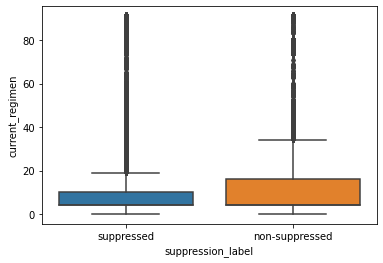

In [104]:
#df['suppression_label'].value_counts

df.head()
sns.boxplot(x='suppression_label',y='current_regimen',data=df)

<AxesSubplot:xlabel='suppressed', ylabel='current_regimen'>

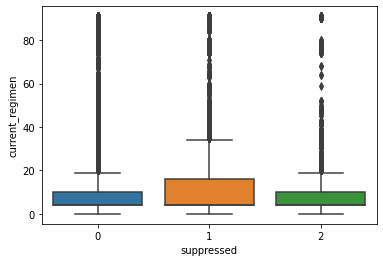

In [101]:
#import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

df.head()
sns.boxplot(x='suppressed',y='current_regimen',data=df)

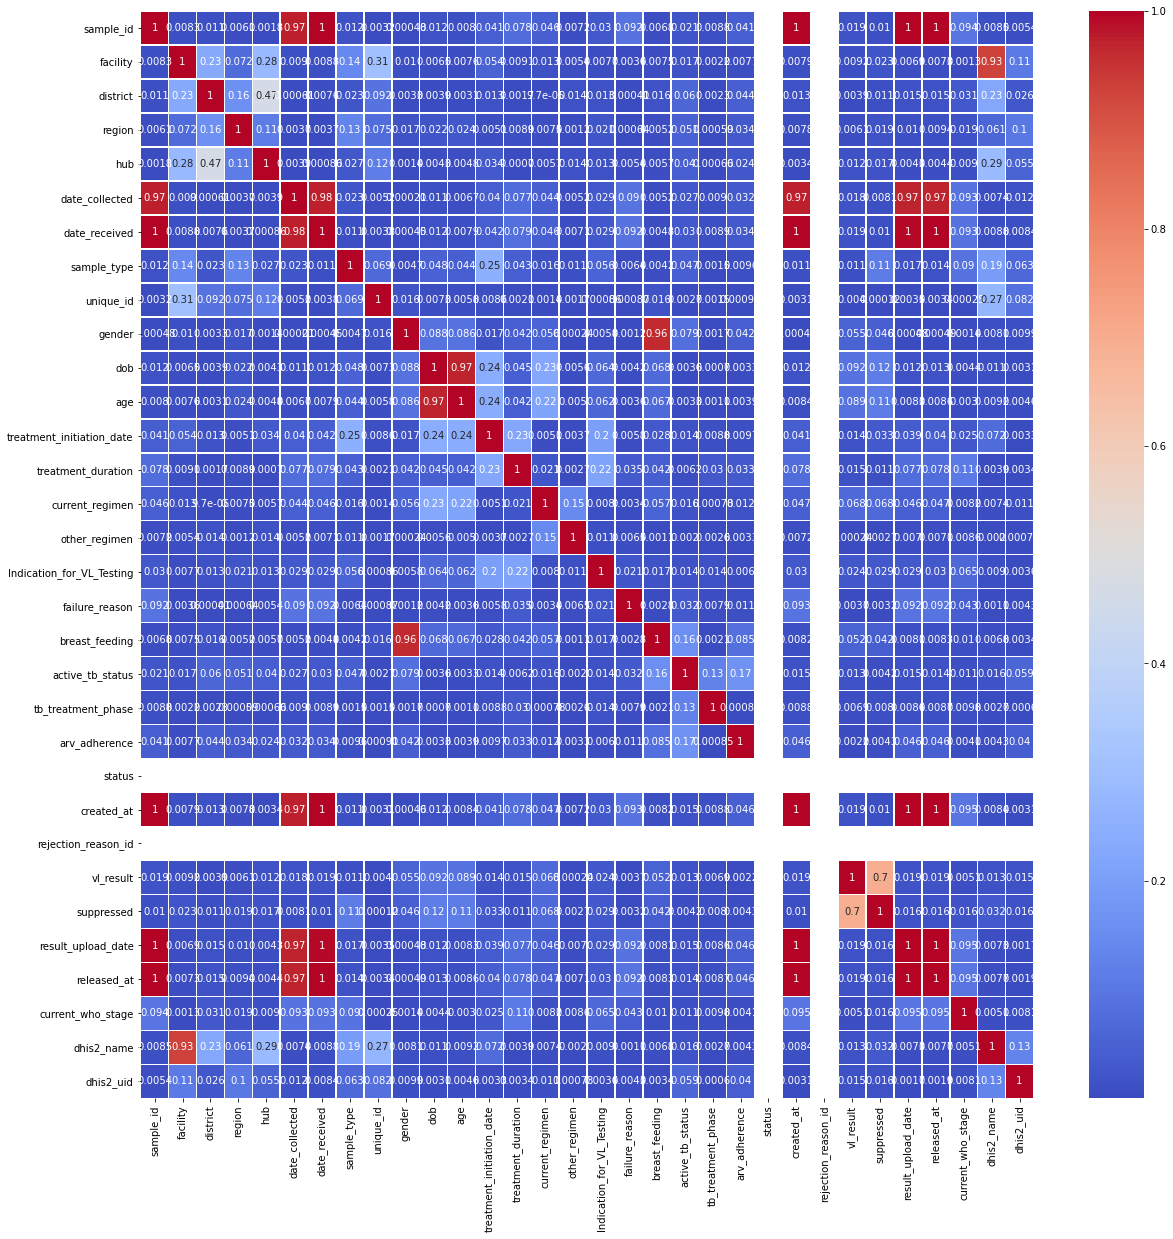

In [81]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr().abs(), annot=True,linewidths=0.5,cmap="coolwarm")
plt.show()

In [75]:
# The status and rejection reason id features were removed coz they did not have any stored values

corr_df = ['sample_id', 'facility', 'district', 'region', 'hub', 'date_collected', 'date_received',
             'sample_type', 'unique_id', 'gender', 'dob', 'age', 'treatment_initiation_date', 
             'treatment_duration', 'current_regimen', 'other_regimen', 'Indication_for_VL_Testing', 
             'failure_reason', 'breast_feeding', 'active_tb_status', 'tb_treatment_phase', 'arv_adherence',
              'created_at', 
             'vl_result', 'suppressed', 'result_upload_date', 'released_at', 'current_who_stage', 'dhis2_name', 
             'dhis2_uid']

show_corr = df[corr_df]

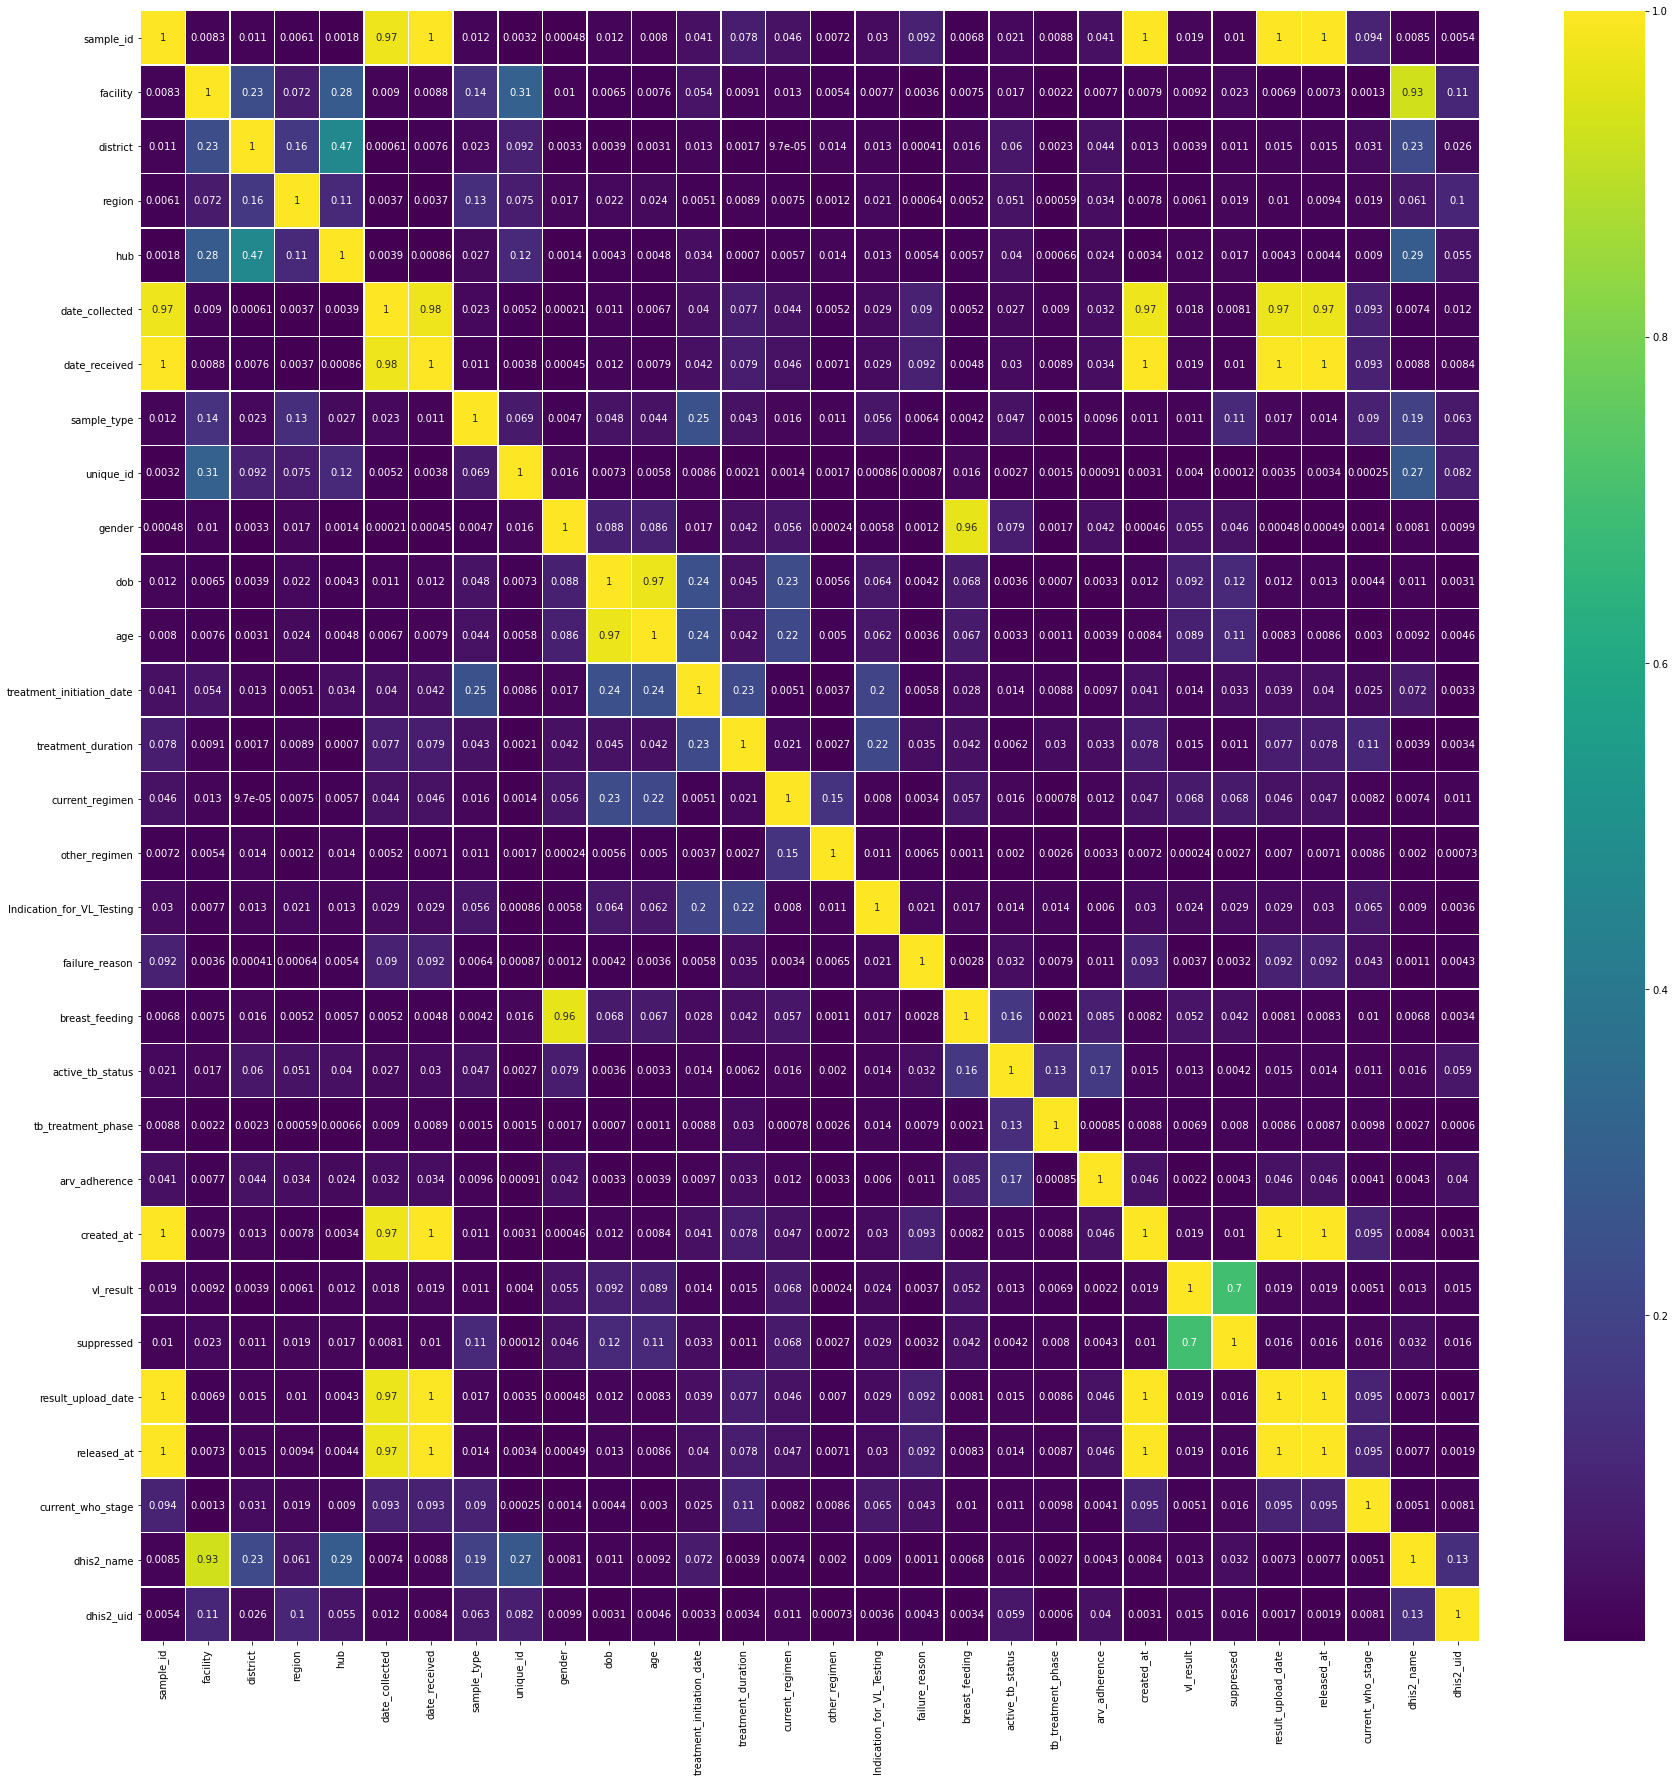

In [97]:
plt.figure(figsize=(30,30))
sns.heatmap(show_corr.corr().abs(), annot=True,linewidths=0.5,cmap="viridis")
plt.show()

In [85]:
# Input and Output features preparation

# The input features
# X = df.drop(['date_collected', 'date_received'], axis = 1)

df.suppressed.value_counts()

0    1087955
1     132138
2       4639
Name: suppressed, dtype: int64

In [91]:
class_counts = df['suppressed'].value_counts()

#Adjust min_count close to suppression 2 e.g 500,000 / 400,000 /300,000
min_count = 800000 

# Undersample class 1 to match the count of the least represented class
class_1_indices = df[df['suppressed'] == '1'].index
undersampled_indices = class_1_indices[:min_count]

# Obtain indices of other classes
class_2_indices = df[df['suppressed'] == '2'].index
#class_3_indices = df[df['suppressed'] == '3'].index

undersampled_indices = undersampled_indices.union(class_2_indices)
#undersampled_indices = undersampled_indices.union(class_3_indices)

# Create the undersampled DataFrame
#undersampled_df = df.loc[undersampled_indices]

undersampled_df = df.loc[undersampled_indices]

# Shuffle the undersampled DataFrame if desired
#undersampled_df = undersampled_df.sample(frac=1).reset_index(drop=True)

In [92]:
undersampled_df['suppressed'].value_counts()

Series([], Name: suppressed, dtype: int64)

In [93]:
undersampled_df.isna().value_counts()

Series([], dtype: int64)

In [ ]:
x= undersampled_df[[' age','gender', 'treatment_duration', 'current_regimen', 'Indication_for_VL_Testing', 'arv_adherence']]

In [ ]:
#hot_encoder =  OneHotEncoder()

#df['current_regimen'] = hot_encoder.fit_transform(df['current_regimen'])
#df['gender'] = hot_encoder.fit_transform(df['gender'])
#df['treatment_duration'] = hot_encoder.fit_transform(df['treatment_duration'])
#df['Indication_for_VL_Testing']= hot_encoder.fit_transform(df['Indication_for_VL_Testing'])
#df['result_alphanumeric']= hot_encoder.fit_transform(df['result_alphanumeric'])
#df['arv_adherence']= hot_encoder.fit_transform(df['arv_adherence'])

#df.head()

In [96]:
label_encoder = LabelEncoder()
undersampled_df['current_regimen'] = label_encoder.fit_transform(undersampled_df['current_regimen'])
undersampled_df['gender'] = label_encoder.fit_transform(undersampled_df['gender'])
undersampled_df['treatment_duration'] = label_encoder.fit_transform(undersampled_df['treatment_duration'])
undersampled_df['Indication_for_VL_Testing']= label_encoder.fit_transform(undersampled_df['Indication_for_VL_Testing'])
undersampled_df['vl_result']= label_encoder.fit_transform(undersampled_df['vl_result'])
undersampled_df['arv_adherence']= label_encoder.fit_transform(undersampled_df['arv_adherence'])

undersampled_df.tail()

,sample_id,facility,district,region,hub,date_collected,date_received,sample_type,unique_id,gender,...,status,created_at,rejection_reason_id,vl_result,suppressed,result_upload_date,released_at,current_who_stage,dhis2_name,dhis2_uid


In [24]:
#after label encoding
undersampled_df.head()

,date_collected,date_received,unique_id,gender,dob,age,treatment_initiation_date,treatment_duration,current_regimen,Indication_for_VL_Testing,arv_adherence,status,created_at,result_alphanumeric,suppressed,result_upload_date,released_at,current_who_stage
0,14-12-18,21-12-18 0:00,689-A-MBL104321,0,01-01-71,48.0,09-03-10,1,1,6,1,1,02-01-19,46841,1,09-01-19,09-01-19,\N
1,17-12-18,29-12-18 0:00,2271-A-14054,0,01-01-80,39.0,13-06-13,4,4,6,1,1,08-01-19,46841,1,10-01-19,10-01-19,1
2,17-12-18,19-12-18 0:00,2271-A-1759,0,01-01-71,48.0,20-09-13,4,10,6,1,1,08-01-19,46841,1,10-01-19,10-01-19,1
3,18-12-18,19-12-18 0:00,2271-A-idc33724,1,01-01-60,59.0,13-02-06,4,78,6,1,1,08-01-19,46841,1,10-01-19,10-01-19,1
4,18-12-18,19-12-18 0:00,2271-A-idc32759,1,01-01-87,32.0,03-07-17,4,10,6,1,1,08-01-19,46841,1,10-01-19,10-01-19,1


All-NaN slice encountered
All-NaN slice encountered


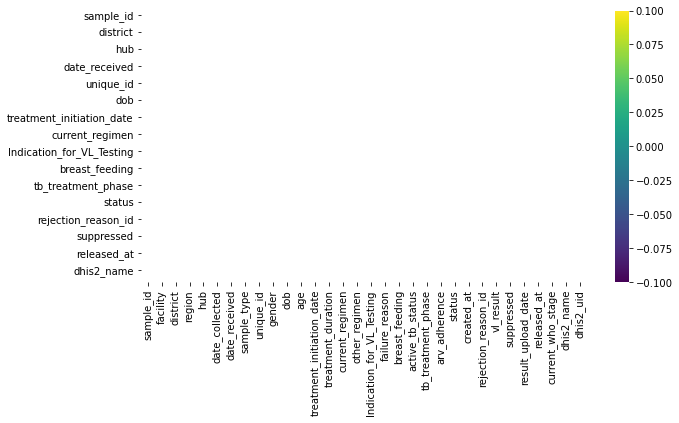

In [94]:
plt.figure(figsize=(10,5))
#sns.heatmap(undersampled_df.corr(), annot=True,linewidths=0.5,cmap="viridis")
sns.heatmap(undersampled_df.corr(), annot=True,linewidths=0.5,cmap="viridis")
plt.show()

<Axes: xlabel='suppressed', ylabel='current_regimen'>

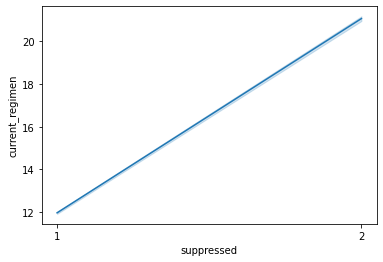

In [65]:
#import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

undersampled_df.tail().head()
sns.lineplot(x='suppressed',y='current_regimen',data=undersampled_df)

In [50]:
 # Fill blanks in 'age' column with the mean value
undersampled_df[' age'] = undersampled_df[' age'].fillna(undersampled_df[' age'].mean())
undersampled_df[' age'].isnull().sum()

0

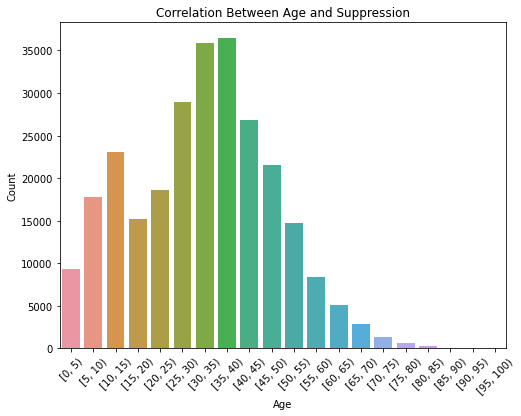

In [51]:
age_ranges = pd.cut(undersampled_df[' age'], bins=range(0, 101, 5), right=False, include_lowest=True)

# Create a cross-tabulation between 'age_ranges' and 'suppressed'
cross_tab = pd.crosstab(age_ranges, undersampled_df['suppressed'])

# Check if the cross-tabulation is empty
if cross_tab.empty:
    print("No data available for the given combination of columns.")
else:
    # Plot the correlation using a bar plot
    plt.figure(figsize=(8, 6))
    sns.barplot(x=cross_tab.index.astype(str), y=cross_tab[cross_tab.columns[1]])
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.title('Correlation Between Age and Suppression')
    plt.xticks(rotation=45)
    plt.show()

In [21]:
#class distribution
undersampled_df['suppressed'].value_counts()

#df['suppressed'].value_counts()

1    800000
2    267167
Name: suppressed, dtype: int64

In [54]:
undersampled_df[' age'] = undersampled_df[' age'].fillna(undersampled_df[' age'].mean())

In [123]:
#define the predictor variables and the response variable
#x= undersampled_df[[' age','gender', 'treatment_duration', 'current_regimen', 'Indication_for_VL_Testing','arv_adherence', 'result_alphanumeric']] 

x= undersampled_df[[' age','gender', 'treatment_duration', 'current_regimen', 'Indication_for_VL_Testing', 'arv_adherence']]
#y= df['suppressed']  # dependent variable 

y = undersampled_df['suppressed']

In [124]:
# check missing values in x
# find if missing values is present
#df.isnull().sum()


x.isnull().sum()


 age                         0
gender                       0
treatment_duration           0
current_regimen              0
Indication_for_VL_Testing    0
arv_adherence                0
dtype: int64

In [125]:
# check missing values in y

y.isnull().sum()

0

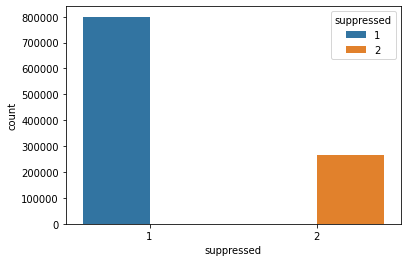

In [126]:
# get the distribution of the target variable
#p = undersampled_df['suppressed'] 
p = undersampled_df[undersampled_df['suppressed'] != 3]

ax = sns.countplot(x='suppressed', data = p, hue='suppressed')

In [ ]:

#sns.pairplot(x) # pairplot for the dataset 


In [127]:
# Splitting the dataset into training (70%) and testing dataset(30%) 
#TrainTest ratio 70:30
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)


In [128]:
# check the shape of x_train and x_test

x_train.shape, x_test.shape

((747016, 6), (320151, 6))

In [129]:
#the shape

print(x.shape, x_train.shape, y.shape, y_train.shape, x_test.shape, y_test.shape)

(1067167, 6) (747016, 6) (1067167,) (747016,) (320151, 6) (320151,)


In [130]:
#RANDOM FOREST CLASSIFIER

# Creating/instantiate the model 
r = RandomForestClassifier()

print(r)

RandomForestClassifier()


In [61]:
#Warning: Takes a bit of time to run approx 5min
#fit the model using the training data
start = time.time()
r.fit(x_train,y_train)
end = time.time()
duration = end - start
print(duration, "seconds to process")

KeyboardInterrupt: 

In [131]:
r.fit(x_train,y_train)

RandomForestClassifier()

In [132]:
print(r.feature_importances_)

[0.33340808 0.01631679 0.07779974 0.33805248 0.18115659 0.05326632]


In [133]:
# Training model evaluation  

# Prediction on the testing dataset 

y_pred = r.predict(x_test)
y_pred

array(['1', '2', '1', ..., '1', '1', '1'], dtype=object)

In [134]:
predictions = pd.DataFrame({"actual":y_test,"predicted":y_pred})
predictions = predictions.reset_index()
predictions.head()

,index,actual,predicted
0,188560,1,1
1,1530020,2,2
2,254150,2,1
3,1076635,2,1
4,488859,1,1


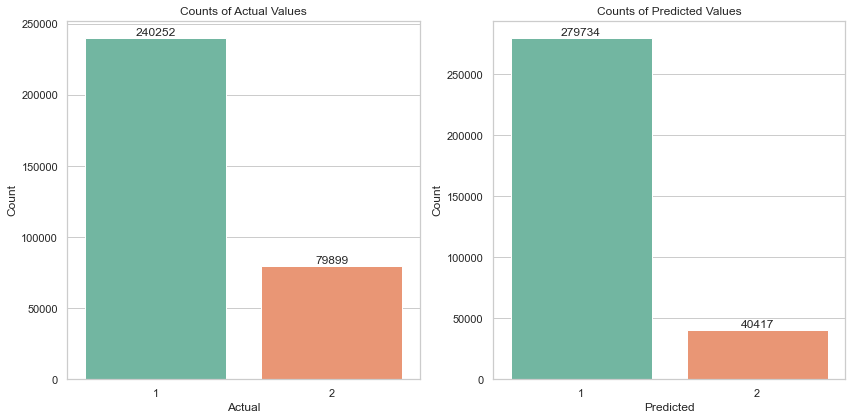

In [137]:
# Create two bar plots side by side
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot for actual values
plt.subplot(1, 2, 1)
ax_actual = sns.countplot(data=predictions, x="actual", palette="Set2")
plt.title("Counts of Actual Values")
plt.xlabel("Actual")
plt.ylabel("Count")

# Add count labels on top of the bars for actual values
for p in ax_actual.patches:
    height = p.get_height()
    ax_actual.annotate(f"{height}", (p.get_x() + p.get_width() / 2, height), ha="center", va="bottom")

# Plot for predicted values
plt.subplot(1, 2, 2)
ax_predicted = sns.countplot(data=predictions, x="predicted", palette="Set2")
plt.title("Counts of Predicted Values")
plt.xlabel("Predicted")
plt.ylabel("Count")

# Add count labels on top of the bars for predicted values
for p in ax_predicted.patches:
    height = p.get_height()
    ax_predicted.annotate(f"{height}", (p.get_x() + p.get_width() / 2, height), ha="center", va="bottom")

plt.tight_layout()
plt.show()

In [138]:
# Filter misclassified records
misclassified_df = predictions[predictions["actual"] != predictions["predicted"]]

# Show the list of misclassified records
print(misclassified_df)

          index actual predicted
2        254150      2         1
3       1076635      2         1
15      2298256      2         1
17       127526      2         1
18       578215      2         1
...         ...    ...       ...
320120  1021430      2         1
320139   273046      2         1
320142   955623      2         1
320146   560114      2         1
320150  3125403      2         1

[69316 rows x 3 columns]


In [146]:

misclassified_df = predictions[predictions["actual"] != predictions["predicted"]]

# Merge misclassified_df with original_data to include more features
misclassified_records = pd.merge(misclassified_df, undersampled_df, left_index=True, right_index=True)

# Show the list of misclassified records with additional features
misclassified_records.head()


,index,actual,predicted,date_collected,date_received,unique_id,gender,dob,age,treatment_initiation_date,...,current_regimen,Indication_for_VL_Testing,arv_adherence,status,created_at,result_alphanumeric,suppressed,result_upload_date,released_at,current_who_stage
2,254150,2,1,17-12-18,19-12-18 0:00,2271-A-1759,0,01-01-71,48.0,20-09-13,...,10,6,1,1,08-01-19,46841,1,10-01-19,10-01-19,1
3,1076635,2,1,18-12-18,19-12-18 0:00,2271-A-idc33724,1,01-01-60,59.0,13-02-06,...,78,6,1,1,08-01-19,46841,1,10-01-19,10-01-19,1
15,2298256,2,1,18-12-18,19-12-18 0:00,2271-A-31244,0,01-01-89,30.0,27-11-14,...,4,6,1,1,08-01-19,46841,1,10-01-19,10-01-19,1
17,127526,2,1,18-12-18,19-12-18 0:00,2271-A-28382,1,01-01-82,37.0,17-05-12,...,10,6,1,1,08-01-19,46841,1,10-01-19,10-01-19,1
18,578215,2,1,18-12-18,19-12-18 0:00,2271-A-2205,1,01-01-72,47.0,01-05-07,...,10,6,1,1,08-01-19,46841,1,10-01-19,10-01-19,1


In [147]:
misclassified_df['current_regimen'].value_counts()

KeyError: 'current_regimen'

In [ ]:
#misclassified_records.to_csv("misclassified_records_undersample_df.csv", index=False)

In [144]:
# Filter misclassified records
misclassified_df = predictions[predictions["actual"] != predictions["predicted"]]

# Get the index of the misclassified records
misclassified_index = misclassified_df.index

# Match the index of the original DataFrame with the misclassified index
matched_original_data = df.loc[misclassified_index]

# Combine misclassified_df with the matched_original_data
misclassified_records = pd.merge(misclassified_df, matched_original_data, left_index=True, right_index=True)

# Show the list of misclassified records with additional features
misclassified_records.head()


,index,actual,predicted,date_collected,date_received,unique_id,gender,dob,age,treatment_initiation_date,...,current_regimen,Indication_for_VL_Testing,arv_adherence,status,created_at,result_alphanumeric,suppressed,result_upload_date,released_at,current_who_stage
2,254150,2,1,17-12-18,19-12-18 0:00,2271-A-1759,F,01-01-71,48,20-09-13,...,1N=TDF-3TC-DTG,Routine Monitoring,Good > 95%,1,08-01-19,Target Not Detected,1,10-01-19,10-01-19,1
3,1076635,2,1,18-12-18,19-12-18 0:00,2271-A-idc33724,M,01-01-60,59,13-02-06,...,6K=DRV+RTV+DTG+AZT/3TC,Routine Monitoring,Good > 95%,1,08-01-19,Target Not Detected,1,10-01-19,10-01-19,1
15,2298256,2,1,18-12-18,19-12-18 0:00,2271-A-31244,F,01-01-89,30,27-11-14,...,1F=TDF-3TC-EFV,Routine Monitoring,Good > 95%,1,08-01-19,Target Not Detected,1,10-01-19,10-01-19,1
17,127526,2,1,18-12-18,19-12-18 0:00,2271-A-28382,M,01-01-82,37,17-05-12,...,1N=TDF-3TC-DTG,Routine Monitoring,Good > 95%,1,08-01-19,Target Not Detected,1,10-01-19,10-01-19,1
18,578215,2,1,18-12-18,19-12-18 0:00,2271-A-2205,M,01-01-72,47,01-05-07,...,1N=TDF-3TC-DTG,Routine Monitoring,Good > 95%,1,08-01-19,Target Not Detected,1,10-01-19,10-01-19,1


In [145]:
#misclassified_records.to_csv("misclassified_records_original_dataframe.csv", index=False)

In [66]:
x_test = x_test.reset_index()
x_test.head()

,index,age,gender,treatment_duration,current_regimen,Indication_for_VL_Testing,arv_adherence,result_alphanumeric
0,188560,47.0,0,0,1,6,1,46841
1,1530020,14.0,1,2,109,6,3,31373
2,254150,39.0,0,1,88,6,1,108
3,1076635,41.0,1,4,10,0,1,415
4,488859,40.0,0,1,3,6,1,46840


In [67]:
merge_pred = pd.merge(x_test,predictions,on="index")
merge_pred.head()

,index,age,gender,treatment_duration,current_regimen,Indication_for_VL_Testing,arv_adherence,result_alphanumeric,actual,predicted
0,188560,47.0,0,0,1,6,1,46841,1,1
1,1530020,14.0,1,2,109,6,3,31373,2,2
2,254150,39.0,0,1,88,6,1,108,2,2
3,1076635,41.0,1,4,10,0,1,415,2,2
4,488859,40.0,0,1,3,6,1,46840,1,1


In [85]:
# print a classification report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.81      0.94      0.87    240252
           2       0.63      0.32      0.42     79899

    accuracy                           0.78    320151
   macro avg       0.72      0.63      0.65    320151
weighted avg       0.76      0.78      0.76    320151



In [86]:
#Check accuracy score 
#previous accuracy 95% then 77.5% & 78.2%

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# y_test are the true class labels and y_pred are the predicted class labels in the test-set.

Model accuracy score: 0.7835


In [87]:
#compare the train-set and test-set accuracy to check for overfitting

y_pred_train = r.predict(x_train)

y_pred_train

array(['1', '2', '1', ..., '1', '1', '1'], dtype=object)

In [88]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8152


In [89]:
#Check for overfitting and underfitting

# print the scores on training and test set

print('Training set score: {:.4f}'.format(r.score(x_train, y_train)))

#print('Test set score: {:.4f}'.format(r.score(y_pred, y_test)))

print('Test set score: {:.4f}'.format(r.score(x_test, y_test)))

#NB From results, These two values are comparable. So, there is no sign of overfitting.

Training set score: 0.8152


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- index


In [90]:
y_test.value_counts()


1    240252
2     79899
Name: suppressed, dtype: int64

In [36]:
# check null accuracy score

null_accuracy = (266712/(266712+31737+1040))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))



#We can see that our model accuracy score is 0.9772 but null accuracy score is 0.8906. So, we can conclude that our Gaussian Naive Bayes Classification model is a good predictor of class labels.

Null accuracy score: 0.8906


In [37]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])



Confusion matrix

 [[232401   7810]
 [  5274  75697]]

True Positives(TP) =  232401

True Negatives(TN) =  75697

False Positives(FP) =  7810

False Negatives(FN) =  5274


In [38]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot non-normalized and normalized confusion matrix
plt.rcParams["figure.figsize"] = (5,5)
titles_options = [
    ("Confusion matrix", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(
        r, x_test, y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()


ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [39]:
#Classification accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
#0.9698

In [ ]:
#Classification error

# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

In [ ]:
#Precision 0.9746

#Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

#So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

#precision can be defined as the ratio of TP to (TP + FP).


# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))
#0.9800 / 0.9675

In [ ]:
#Recall
#Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

#Recall identifies the proportion of correctly predicted actual positives.

#recall can be given as the ratio of TP to (TP + FN).


recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))
#0.9795 / 0.9772

In [ ]:
#True Positive Rate
#True Positive Rate is synonymous with Recall.

true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
#0.9795 /0.9772

In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
#0.0593

In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))
#0.9409

In [ ]:
#f1-score is the harmonic mean of precision and recall. 

print('f1score:',round(f1_score(y_test,y_pred,average='weighted')*100),'%')
#97%

In [ ]:
#k-Fold Cross Validation

# Applying 10-Fold Cross Validation
#changed CV from 10 to 2 coz that y value had 2 values less than the 10 folds

from sklearn.model_selection import cross_val_score

scores = cross_val_score(r, x_train, y_train, cv = 2, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

In [ ]:
#We can summarize the cross-validation accuracy by calculating its mean.
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

In [ ]:
#The base value:it is the mean prediction for the model

y_test.mean()

In [ ]:
 # average values of the predictors
    
x_train.mean() 

In [ ]:
#SHAP 
#Each feature has a shap value contributing to the prediction.
#The final prediction = the average prediction + the shap values of all features.
#The shap value of a feature can be positive or negative.
#If a feature is positively correlated to the target, a value higher than its own average will contribute positively to the prediction.
#If a feature is negatively correlated to the target, a value higher than its own average will contribute negatively to the prediction.

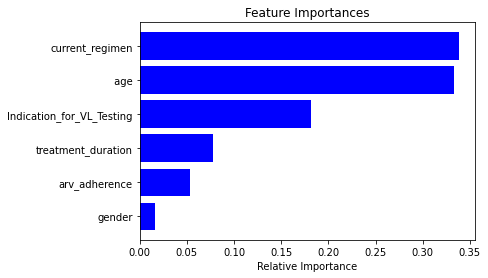

In [91]:
import plotly
np.random.seed(0)

importances = r.feature_importances_
indices = np.argsort(importances)

features = x_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
shap_values = shap.TreeExplainer(r).shap_values(x_train)

In [ ]:
row_to_show = 0
data_for_prediction = x_test.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)


r.predict(data_for_prediction_array)

In [ ]:

# Create object that can calculate shap values
explainer = shap.TreeExplainer(r)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

In [ ]:
#shap.initjs()  is used here
shap.force_plot(explainer.expected_value[0], shap_values[0], data_for_prediction)   #working


In [ ]:
x.columns

In [ ]:
x_featurenames = x.columns


In [ ]:
#LIME:  The LIME output for Observation 1 in X_test
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(np.array(x_train),
                    feature_names=x_featurenames, 
                    class_names=['quality'], 
                    # categorical_features=, 
                    # There is no categorical features in this example, otherwise specify them.                               
                    verbose=True, mode='regression')


In [ ]:
exp = explainer.explain_instance(x_test.iloc[0], 
     r.predict, num_features=6)
exp.as_pyplot_figure()

In [ ]:
#The coefficients of the LIME model

pd.DataFrame(exp.as_list())

In [ ]:
#show all the results in a notebook-like format:
exp.show_in_notebook(show_table=True, show_all=False)

In [68]:
#GAUSSIAN NAIVE BAYES CLASSIFIER

# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

In [69]:
# instantiate the model 
gnb = GaussianNB()


In [70]:

# fit the model
gnb.fit(x_train, y_train)

GaussianNB()

In [71]:
# check the shape of x_train and x_test

x_train.shape, x_test.shape

((747016, 7), (320151, 8))

In [73]:
#Predict the results 

ygnb_pred = gnb.predict(x_test)

ygnb_pred

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- index


In [71]:
#Model accuracy was 0.94 before sampling, accuracy at 500,000 = 0.8976, at 300,000 = 0.6973

#Check accuracy score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, ygnb_pred)))

# y_test are the true class labels and y_pred are the predicted class labels in the test-set.

Model accuracy score: 0.9221


In [72]:
#compare the train-set and test-set accuracy to check for overfitting

ygnb_pred_train = gnb.predict(x_train)

ygnb_pred_train

array(['1', '2', '1', ..., '2', '1', '1'], dtype='<U1')

In [73]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, ygnb_pred_train)))
# 0.919

Training-set accuracy score: 0.9218


In [74]:
#Before sampling:Training set score: 0.9440
#Before sampling:Test set score: 0.9439

#Check for overfitting and underfitting

# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(x_test, y_test)))

#NB From results, These two values are quite comparable. So, there is no sign of overfitting.

Training set score: 0.9218
Test set score: 0.9221


In [75]:
#Compare model accuracy with null accuracy
#So, the model accuracy is 0.9439. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

#So, we should first check the class distribution in the test set.

# check class distribution in test set

y_test.value_counts()

#We can see that the occurences of most frequent class is 266712. So, we can calculate null accuracy by dividing 266712 by total number of occurences.

1    240211
2     80971
Name: suppressed, dtype: int64

In [76]:
# check null accuracy score

null_accuracy = (266712/(266712+31737+1040))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))


Null accuracy score: 0.8906


In [77]:


# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, ygnb_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


Confusion matrix

 [[229694  10517]
 [ 14494  66477]]

True Positives(TP) =  229694

True Negatives(TN) =  66477

False Positives(FP) =  10517

False Negatives(FN) =  14494


In [78]:
# Plot non-normalized and normalized confusion matrix

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


plt.rcParams["figure.figsize"] = (5,5)
titles_options = [
    ("Confusion matrix", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(
        gnb,x_test,y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [79]:
#Classification Report
#Classification report is another way to evaluate the classification model performance. 
#It displays the precision, recall, f1 and support scores for the model.

print(classification_report(y_test, ygnb_pred))

              precision    recall  f1-score   support

           1       0.94      0.96      0.95    240211
           2       0.86      0.82      0.84     80971

    accuracy                           0.92    321182
   macro avg       0.90      0.89      0.90    321182
weighted avg       0.92      0.92      0.92    321182



In [80]:
#Classification accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

In [ ]:
#Classification error

# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

In [ ]:
#Precision


precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

In [ ]:
#Recall

recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

In [ ]:

#True Positive Rate is synonymous with Recall.

true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

In [ ]:

#f1-score = (precision + recall) / 2  = 1.9368 / 2 = 0.9684



In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

In [ ]:
#Warning:This runs for long

#k-Fold Cross Validation

# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, x_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

In [ ]:
#We can summarize the cross-validation accuracy by calculating its mean.
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

In [ ]:
#The base value:it is the mean prediction for the model

y_test.mean()

In [ ]:
 # average values of the predictors
    
x_train.mean() 

In [ ]:
#LIME:  The LIME output for Observation 1 in X_test
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(np.array(x_train),
                    feature_names=x_featurenames, 
                    class_names=['quality'], 
                    # categorical_features=, 
                    # There is no categorical features in this example, otherwise specify them.                               
                    verbose=True, mode='regression')


In [ ]:
exp = explainer.explain_instance(x_test.iloc[0], 
     gnb.predict, num_features=6)
exp.as_pyplot_figure()

In [ ]:
#The coefficients of the LIME model

pd.DataFrame(exp.as_list())

In [ ]:
#show all the results in a notebook-like format:
exp.show_in_notebook(show_table=True, show_all=False)

In [74]:
#KNEIGHBORS CLASSIFIER    

#We will also find the best parameters for the model using hyperparameter tuning.

#Instatiate the model

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [75]:
#Warning: This run for a bit of time

#Training the model
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [76]:
#Prediction on the testing dataset
yknn_pred = knn.predict(x_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- index


In [84]:
#Warning: This runs for long

#Check classification_report
print(classification_report(y_test, yknn_pred))

              precision    recall  f1-score   support

           1       0.98      0.99      0.98    240211
           2       0.97      0.94      0.95     80971

    accuracy                           0.98    321182
   macro avg       0.97      0.96      0.97    321182
weighted avg       0.98      0.98      0.98    321182



In [77]:
print('Training set score: {:.4f}'.format(knn.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(x_test, y_test)))

Training set score: 0.9841


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- index


In [78]:
predictions = pd.DataFrame({"actual":y_test,"predicted":y_pred})
predictions = predictions.reset_index()
predictions.head()

,index,actual,predicted
0,188560,1,1
1,1530020,2,2
2,254150,2,2
3,1076635,2,2
4,488859,1,1


In [79]:
x_test = x_test.reset_index()
x_test.head()

,level_0,index,age,gender,treatment_duration,current_regimen,Indication_for_VL_Testing,arv_adherence,result_alphanumeric
0,0,188560,47.0,0,0,1,6,1,46841
1,1,1530020,14.0,1,2,109,6,3,31373
2,2,254150,39.0,0,1,88,6,1,108
3,3,1076635,41.0,1,4,10,0,1,415
4,4,488859,40.0,0,1,3,6,1,46840


In [80]:
merge_pred = pd.merge(x_test,predictions,on="index")
merge_pred.head()

#merge_pred.to_csv('knn_merged_predictions.csv', index=False)

,level_0,index,age,gender,treatment_duration,current_regimen,Indication_for_VL_Testing,arv_adherence,result_alphanumeric,actual,predicted
0,0,188560,47.0,0,0,1,6,1,46841,1,1
1,1,1530020,14.0,1,2,109,6,3,31373,2,2
2,2,254150,39.0,0,1,88,6,1,108,2,2
3,3,1076635,41.0,1,4,10,0,1,415,2,2
4,4,488859,40.0,0,1,3,6,1,46840,1,1


In [81]:
merge_pred["age_group"] = pd.cut(merge_pred[' age'], bins=range(0, 101, 10), right=False, include_lowest=True)
merge_pred.head()

,level_0,index,age,gender,treatment_duration,current_regimen,Indication_for_VL_Testing,arv_adherence,result_alphanumeric,actual,predicted,age_group
0,0,188560,47.0,0,0,1,6,1,46841,1,1,"[40, 50)"
1,1,1530020,14.0,1,2,109,6,3,31373,2,2,"[10, 20)"
2,2,254150,39.0,0,1,88,6,1,108,2,2,"[30, 40)"
3,3,1076635,41.0,1,4,10,0,1,415,2,2,"[40, 50)"
4,4,488859,40.0,0,1,3,6,1,46840,1,1,"[40, 50)"


In [119]:
##Gender variable cleaned##
undersampled_df['gender'].value_counts()

0    697474
1    369693
Name: gender, dtype: int64

In [83]:
knn_filter = merge_pred[(merge_pred['actual'] == '2') & (merge_pred['predicted'] == '1')]
knn_filter.head()


,level_0,index,age,gender,treatment_duration,current_regimen,Indication_for_VL_Testing,arv_adherence,result_alphanumeric,actual,predicted,age_group
49,49,1236116,32.0,1,0,10,6,1,34581,2,1,"[30, 40)"
86,86,1348679,21.0,0,0,4,6,1,17723,2,1,"[20, 30)"
145,145,867370,51.0,0,1,4,6,1,18180,2,1,"[50, 60)"
159,159,970547,56.0,1,3,4,6,1,8299,2,1,"[50, 60)"
160,160,3078471,53.0,1,4,10,6,1,45575,2,1,"[50, 60)"


In [84]:
knn_filter['age_group'].value_counts()

[30, 40)     1606
[40, 50)     1204
[20, 30)      933
[50, 60)      582
[10, 20)      511
[0, 10)       250
[60, 70)      225
[70, 80)       46
[80, 90)        4
[90, 100)       0
Name: age_group, dtype: int64

In [95]:

knn_data = x_test

knn_data["age_band"] = pd.cut(knn_data[' age'], bins=range(0, 101, 10), right=False, include_lowest=True)

knn_data.head()

,level_0,index,age,gender,treatment_duration,current_regimen,Indication_for_VL_Testing,arv_adherence,result_alphanumeric,age_band
0,0,188560,47.0,0,0,1,6,1,46841,"[40, 50)"
1,1,1530020,14.0,1,2,109,6,3,31373,"[10, 20)"
2,2,254150,39.0,0,1,88,6,1,108,"[30, 40)"
3,3,1076635,41.0,1,4,10,0,1,415,"[40, 50)"
4,4,488859,40.0,0,1,3,6,1,46840,"[40, 50)"


In [86]:
knn_data["age_band"].value_counts()

[30, 40)     96823
[40, 50)     72525
[20, 30)     57256
[50, 60)     37581
[10, 20)     24827
[0, 10)      15888
[60, 70)     12051
[70, 80)      2651
[80, 90)       443
[90, 100)       51
Name: age_band, dtype: int64

In [87]:
knn_df = pd.DataFrame(knn_data["age_band"].value_counts())
knn_df = knn_df.reset_index()
knn_df.head()

,index,age_band
0,"[30, 40)",96823
1,"[40, 50)",72525
2,"[20, 30)",57256
3,"[50, 60)",37581
4,"[10, 20)",24827


In [115]:
total_count = knn_df["age_band"].sum()

knn_df["proportion"] = knn_df["age_band"] / total_count
knn_df["percentage"] = knn_df["proportion"] * 100 

knn_df

,index,age_band,proportion,percentage
0,"[30, 40)",96823,0.302481,30.248113
1,"[40, 50)",72525,0.226573,22.657265
2,"[20, 30)",57256,0.178871,17.887134
3,"[50, 60)",37581,0.117405,11.740540
4,"[10, 20)",24827,0.077561,7.756111
5,"[0, 10)",15888,0.049635,4.963511
6,"[60, 70)",12051,0.037648,3.764808
7,"[70, 80)",2651,0.008282,0.828189
8,"[80, 90)",443,0.001384,0.138396
9,"[90, 100)",51,0.000159,0.015933


In [ ]:
#clean gender values first
#merge age_band count into actual, predicted with age_group
#then calculate percentages for proportions for age bands

In [121]:
knn_filter = pd.concat([knn_filter, knn_data["age_band"]], axis=1)

# Print the updated DataFrame
knn_filter.head()

,level_0,index,age,gender,treatment_duration,current_regimen,Indication_for_VL_Testing,arv_adherence,result_alphanumeric,actual,predicted,age_group,age_band,age_band,age_band,age_band
49,49.0,1236116.0,32.0,1.0,0.0,10.0,6.0,1.0,34581.0,2,1,"[30, 40)","[30, 40)","[30, 40)","[30, 40)","[30, 40)"
86,86.0,1348679.0,21.0,0.0,0.0,4.0,6.0,1.0,17723.0,2,1,"[20, 30)","[20, 30)","[20, 30)","[20, 30)","[20, 30)"
145,145.0,867370.0,51.0,0.0,1.0,4.0,6.0,1.0,18180.0,2,1,"[50, 60)","[50, 60)","[50, 60)","[50, 60)","[50, 60)"
159,159.0,970547.0,56.0,1.0,3.0,4.0,6.0,1.0,8299.0,2,1,"[50, 60)","[50, 60)","[50, 60)","[50, 60)","[50, 60)"
160,160.0,3078471.0,53.0,1.0,4.0,10.0,6.0,1.0,45575.0,2,1,"[50, 60)","[50, 60)","[50, 60)","[50, 60)","[50, 60)"


In [122]:
#knn_filter.to_csv('knn_merged_predictions.csv', index=False)

In [86]:
#Check accuracy score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, yknn_pred)))

# y_test are the true class labels and y_pred are the predicted class labels in the test-set.
#0.9813

Model accuracy score: 0.9766


In [ ]:

y_test.value_counts()


In [ ]:
# check null accuracy score

null_accuracy = (266712/(266712+31737+1040))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

#We can see that our model accuracy score is 0.9889 but null accuracy score is 0.8906. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels

In [ ]:

# Print the Confusion Matrix and slice it into four pieces


cm = confusion_matrix(y_test, yknn_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])



In [ ]:
from sklearn.metrics import plot_confusion_matrix

# Plot non-normalized and normalized confusion matrix
plt.rcParams["figure.figsize"] = (5,5)
titles_options = [
    ("Confusion matrix", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(
        knn,x_test,y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

In [87]:
#Classification accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


In [88]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9221


In [ ]:
#Classification error

# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

In [ ]:
#precision can be defined as the ratio of TP to (TP + FP).

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

In [ ]:
#recall can be given as the ratio of TP to (TP + FN).


recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

In [ ]:
#True Positive Rate is synonymous with Recall.

true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

In [ ]:
#f1-score is the harmonic mean of precision and recall. 

#f1-score = (precision + recall) / 2  = 1.9877 / 2 = 0.9939



#print('f1score         :',round(f1_score(y_test,yknn_pred,average='weighted')*100),'%')

f1_score = (precision + recall) / 2
print('f1-score : {0:0.4f}'.format(f1_score))


In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

In [ ]:
#k-Fold Cross Validation

# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, x_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

In [ ]:
#We can summarize the cross-validation accuracy by calculating its mean.

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

In [ ]:
#The base value:it is the mean prediction for the model

y_test.mean()

In [ ]:
 # average values of the predictors
    
x_train.mean() 

In [ ]:
#LIME:  The LIME output for Observation 1 in X_test
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(np.array(x_train),
                    feature_names=x_featurenames, 
                    class_names=['quality'], 
                    # categorical_features=, 
                    # There is no categorical features in this example, otherwise specify them.                               
                    verbose=True, mode='regression')


In [ ]:
exp = explainer.explain_instance(x_test.iloc[0], 
     knn.predict, num_features=6)
exp.as_pyplot_figure()

In [ ]:
#The coefficients of the LIME model

pd.DataFrame(exp.as_list())

In [ ]:
#show all the results in a notebook-like format:
exp.show_in_notebook(show_table=True, show_all=False)

In [89]:

#DECISION TREE REGRESSION MODEL

# Creating the model
LL_dt = DecisionTreeRegressor()


In [90]:
# Fitting the model
LL_dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [91]:
#Predict testing set

ydt_pred = LL_dt.predict(x_test)
ydt_pred = ydt_pred.astype(int)
y_test = y_test.astype(int)


In [92]:
#Check  classification_report
print(classification_report(y_test, ydt_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00    240211
           2       0.99      0.99      0.99     80971

    accuracy                           0.99    321182
   macro avg       0.99      0.99      0.99    321182
weighted avg       0.99      0.99      0.99    321182



In [93]:
#Predict the results 

ydt_pred = LL_dt.predict(x_test)

ydt_pred

array([2., 2., 1., ..., 1., 2., 1.])

In [94]:
#Check accuracy score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, ydt_pred)))

# y_test are the true class labels and y_pred are the predicted class labels in the test-set.
#0.9954

#mse = mean_squared_error(y_test, ydt_pred)
#print('Mean Squared Error: {0:0.4f}'.format(mse))

Model accuracy score: 0.9932


In [95]:
#compare the train-set and test-set accuracy to check for overfitting

ydt_pred_train = LL_dt.predict(x_train)

ydt_pred_train

array([1., 2., 2., ..., 2., 1., 1.])

In [121]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, ydt_pred_train)))

#mse_train = mean_squared_error(y_train, ydt_pred_train)
#print('Training-set Mean Squared Error: {0:0.4f}'.format(mse_train))

TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=['1' '2'] and y_pred=[1. 2.]. Make sure that the predictions provided by the classifier coincides with the true labels.

In [120]:
#Check for overfitting and underfitting

# print the scores on training and test set

print('Training set score: {:.4f}'.format(LL_dt.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(LL_dt.score(x_test, y_test)))


#NB From results, These two values are quite comparable. So, there is no sign of overfitting.

Training set score: 1.0000
Test set score: 0.9639


In [126]:
predictions = pd.DataFrame({"actual":y_test,"predicted":y_pred})
predictions = predictions.reset_index()
predictions.head()

,index,actual,predicted
0,1379484,2,2
1,2237818,2,2
2,803310,1,1
3,516634,1,1
4,2651036,2,2


In [127]:
x_test = x_test.reset_index()
x_test.head()


,level_0,index,age,gender,treatment_duration,current_regimen,Indication_for_VL_Testing,arv_adherence,result_alphanumeric
0,0,1379484,37.0,2,0,4,4,1,39459
1,1,2237818,8.0,0,3,59,5,1,13320
2,2,803310,50.0,2,1,1,6,1,47147
3,3,516634,51.0,2,0,54,6,1,47146
4,4,2651036,52.0,2,0,10,6,1,22712


In [128]:
merge_pred = pd.merge(x_test,predictions,on="index")
merge_pred.head()

merge_pred.to_csv('dtree_merged_predictions.csv', index=False)

In [102]:

y_test.value_counts()

#We can see that the occurences of most frequent class is 266712. So, we can calculate null accuracy by dividing 266712 by total number of occurences.
#Compare model accuracy with null accuracy
#So, the model accuracy is 0.9950. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.
#So, we should first check the class distribution in the test set.
# check class distribution in test set


1    240211
2     80971
Name: suppressed, dtype: int64

In [103]:
# check null accuracy score

null_accuracy = (266712/(266712+31737+1040))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

#We can see that our model accuracy score is 0.9889 but null accuracy score is 0.8906. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels

Null accuracy score: 0.8906


In [ ]:


# Print the Confusion Matrix and slice it into four pieces


cm = confusion_matrix(y_test, ydt_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


In [ ]:
 # Assuming you have cm as your confusion matrix

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0, 0])
print('\nTrue Negatives(TN) = ', cm[1, 1])
print('\nFalse Positives(FP) = ', cm[0, 1])
print('\nFalse Negatives(FN) = ', cm[1, 0])

# Plotting the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Adding labels to the plot
classes = np.array(['Class 0', 'Class 1'])  # Modify the labels accordingly
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)

# Adding text annotations
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
#cm = confusion_matrix(y_test, ylog_pred)
cm = confusion_matrix(y_test, ydt_pred)
print('Confusion matrix:\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0, 0])
print('\nTrue Negatives(TN) = ', cm[1, 1])
print('\nFalse Positives(FP) = ', cm[0, 1])
print('\nFalse Negatives(FN) = ', cm[1, 0])

# Calculate the normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plotting the confusion matrix
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.colorbar()

# Adding labels to the plot
classes = np.array(['Class 0', 'Class 1'])  # Modify the labels accordingly
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)

# Adding text annotations
thresh = cm_normalized.max() / 2.0
for i in range(cm_normalized.shape[0]):
    for j in range(cm_normalized.shape[1]):
        plt.text(j, i, format(cm_normalized[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm_normalized[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()


In [104]:
#Classification accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

In [ ]:
#Classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

In [ ]:
#precision can be defined as the ratio of TP to (TP + FP).


precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

In [ ]:

#recall can be given as the ratio of TP to (TP + FN).


recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

In [ ]:
#True Positive Rate
#True Positive Rate is synonymous with Recall.

true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

In [ ]:
#f1-score is the harmonic mean of precision and recall. 

#f1_score = (precision + recall) / 2 
#print('f1-score:',round(f1_score(y_test,ydt_pred,average='weighted')*100),'%')

f1_score = (precision + recall) / 2
print('f1-score : {0:0.4f}'.format(f1_score))


In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

In [ ]:
#k-Fold Cross Validation

# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(LL_dt, x_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

In [ ]:
#We can summarize the cross-validation accuracy by calculating its mean.
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

In [ ]:
#LIME:  The LIME output for Observation 1 in X_test
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(np.array(x_train),
                    feature_names=x_featurenames, 
                    class_names=['quality'], 
                    # categorical_features=, 
                    # There is no categorical features in this example, otherwise specify them.                               
                    verbose=True, mode='regression')


In [ ]:
exp = explainer.explain_instance(x_test.iloc[0], 
     LL_dt.predict, num_features=6)
exp.as_pyplot_figure()

In [ ]:
#The coefficients of the LIME model

pd.DataFrame(exp.as_list())

In [ ]:
#show all the results in a notebook-like format:
exp.show_in_notebook(show_table=True, show_all=False)

In [105]:
#LOGISTIC REGRESSION
#Logistic regression can be explained better in odds ration. The odds of an event occuring are defined
#as the probability of an event occuring divided by the probability of that event not occuring.

# instantiate a logistic regression model, and fit with X and y


Logisticmodel = LogisticRegression()



In [106]:

# Fitting the model

Logisticmodel.fit(x_train, y_train)

LogisticRegression()

In [107]:
# Training model evaluation  

# Prediction on the testing dataset 

ylog_pred=Logisticmodel.predict(x_test)

In [108]:
# print a classification report

#ylog_pred = ylog_pred.astype(int)
#y_test = y_test.astype(int)

# Convert predicted labels to strings
ylog_pred = ylog_pred.astype(str)

# Convert true labels to strings
y_test = y_test.astype(str)

print(classification_report(y_test, ylog_pred,zero_division=1))

              precision    recall  f1-score   support

           1       0.92      0.97      0.94    240211
           2       0.89      0.74      0.81     80971

    accuracy                           0.91    321182
   macro avg       0.90      0.86      0.88    321182
weighted avg       0.91      0.91      0.91    321182



In [109]:
#Predict the results 

ylog_pred = Logisticmodel.predict(x_test)

ylog_pred


array(['1', '2', '1', ..., '1', '1', '1'], dtype=object)

In [110]:
#Check accuracy score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, ylog_pred)))

# y_test are the true class labels and y_pred are the predicted class labels in the test-set.
#0.9051

Model accuracy score: 0.9125


In [111]:
#compare the train-set and test-set accuracy to check for overfitting

ylog_pred_train = Logisticmodel.predict(x_train) 


ylog_pred_train

array(['1', '1', '1', ..., '2', '1', '1'], dtype=object)

In [112]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, ylog_pred_train)))

Training-set accuracy score: 0.9125


In [113]:
#Check for overfitting and underfitting

# print the scores on training and test set

print('Training set score: {:.4f}'.format(Logisticmodel.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(Logisticmodel.score(x_test, y_test)))

#NB From results, These two values are not comparable. So, there is no sign of underfitting.

Training set score: 0.9125
Test set score: 0.9125


In [ ]:

y_test.value_counts()

#We can see that the occurences of most frequent class is 266712. So, we can calculate null accuracy by dividing 266712 by total number of occurences.

#Compare model accuracy with null accuracy
#So, the model accuracy is 0.9297. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

#So, we should first check the class distribution in the test set.

# check class distribution in test set


In [114]:

# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, ylog_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])


print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])



Confusion matrix

 [[232848   7363]
 [ 20727  60244]]

True Positives(TP) =  232848

True Negatives(TN) =  60244

False Positives(FP) =  7363

False Negatives(FN) =  20727


In [ ]:

# Plot non-normalized and normalized confusion matrix
plt.rcParams["figure.figsize"] = (5,5)
titles_options = [
    ("Confusion matrix", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(
        Logisticmodel,x_test,y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

In [115]:
#Classification accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


In [116]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9125


In [ ]:
#Classification error

# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

In [ ]:

#precision can be defined as the ratio of TP to (TP + FP).


precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

In [ ]:

#recall can be given as the ratio of TP to (TP + FN).


recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

In [ ]:
#True Positive Rate
#True Positive Rate is synonymous with Recall.

true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

In [ ]:
#f1-score is the harmonic mean of precision and recall. 

f1_score = (precision + recall) / 2
print('f1-score : {0:0.4f}'.format(f1_score))


In [ ]:
#k-Fold Cross Validation

# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(Logisticmodel, x_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

In [ ]:
#We can summarize the cross-validation accuracy by calculating its mean.
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

In [ ]:
#The base value:it is the mean prediction for the model

y_test.mean()

In [ ]:
 # average values of the predictors
    
x_train.mean() 

In [117]:
#LIME:  The LIME output for Observation 1 in X_test
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(np.array(x_train),
                    feature_names=x_featurenames, 
                    class_names=['quality'], 
                    # categorical_features=, 
                    # There is no categorical features in this example, otherwise specify them.                               
                    verbose=True, mode='regression')


NameError: name 'x_featurenames' is not defined

In [ ]:
exp = explainer.explain_instance(x_test.iloc[0], 
     Logisticmodel.predict, num_features=6)
exp.as_pyplot_figure()

In [ ]:
#The coefficients of the LIME model

pd.DataFrame(exp.as_list())

In [ ]:
#show all the results in a notebook-like format:
exp.show_in_notebook(show_table=True, show_all=False)